In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,worker_group_code,worker_group_name,department_code,department_name,union_code,union_name,job_group_code,job_group,job_code,job,salary
0,1,4,Community Health,DPH,DPH Public Health,791.0,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,2139.13
1,2,2,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",5300,Sub-Professional Engineering,5380,"Stdntdsgntrain1, Arch/Eng/Plng",8769.90
2,3,6,General Administration & Finance,TIS,DT GSA - Technology,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1634,Principal Account Clerk,27267.91
3,4,4,Community Health,DPH,DPH Public Health,351.0,Municipal Executive Association - Miscellaneous,900,Management,2620,Food Service Mgr Administrator,396.58
4,5,2,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",6300,Construction Inspection,6318,Construction Inspector,27519.82


In [3]:
train.head(5)

,id,worker_group_code,worker_group_name,department_code,department_name,union_code,union_name,job_group_code,job_group,job_code,job,salary
0,1,4,Community Health,DPH,DPH Public Health,791.0,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,2139.13
1,2,2,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",5300,Sub-Professional Engineering,5380,"Stdntdsgntrain1, Arch/Eng/Plng",8769.90
2,3,6,General Administration & Finance,TIS,DT GSA - Technology,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1634,Principal Account Clerk,27267.91
3,4,4,Community Health,DPH,DPH Public Health,351.0,Municipal Executive Association - Miscellaneous,900,Management,2620,Food Service Mgr Administrator,396.58
4,5,2,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",6300,Construction Inspection,6318,Construction Inspector,27519.82


In [4]:
# checking the data types of the attributes
train.dtypes


id                     int64
worker_group_code      int64
worker_group_name     object
department_code       object
department_name       object
union_code           float64
union_name            object
job_group_code        object
job_group             object
job_code              object
job                   object
salary               float64
dtype: object

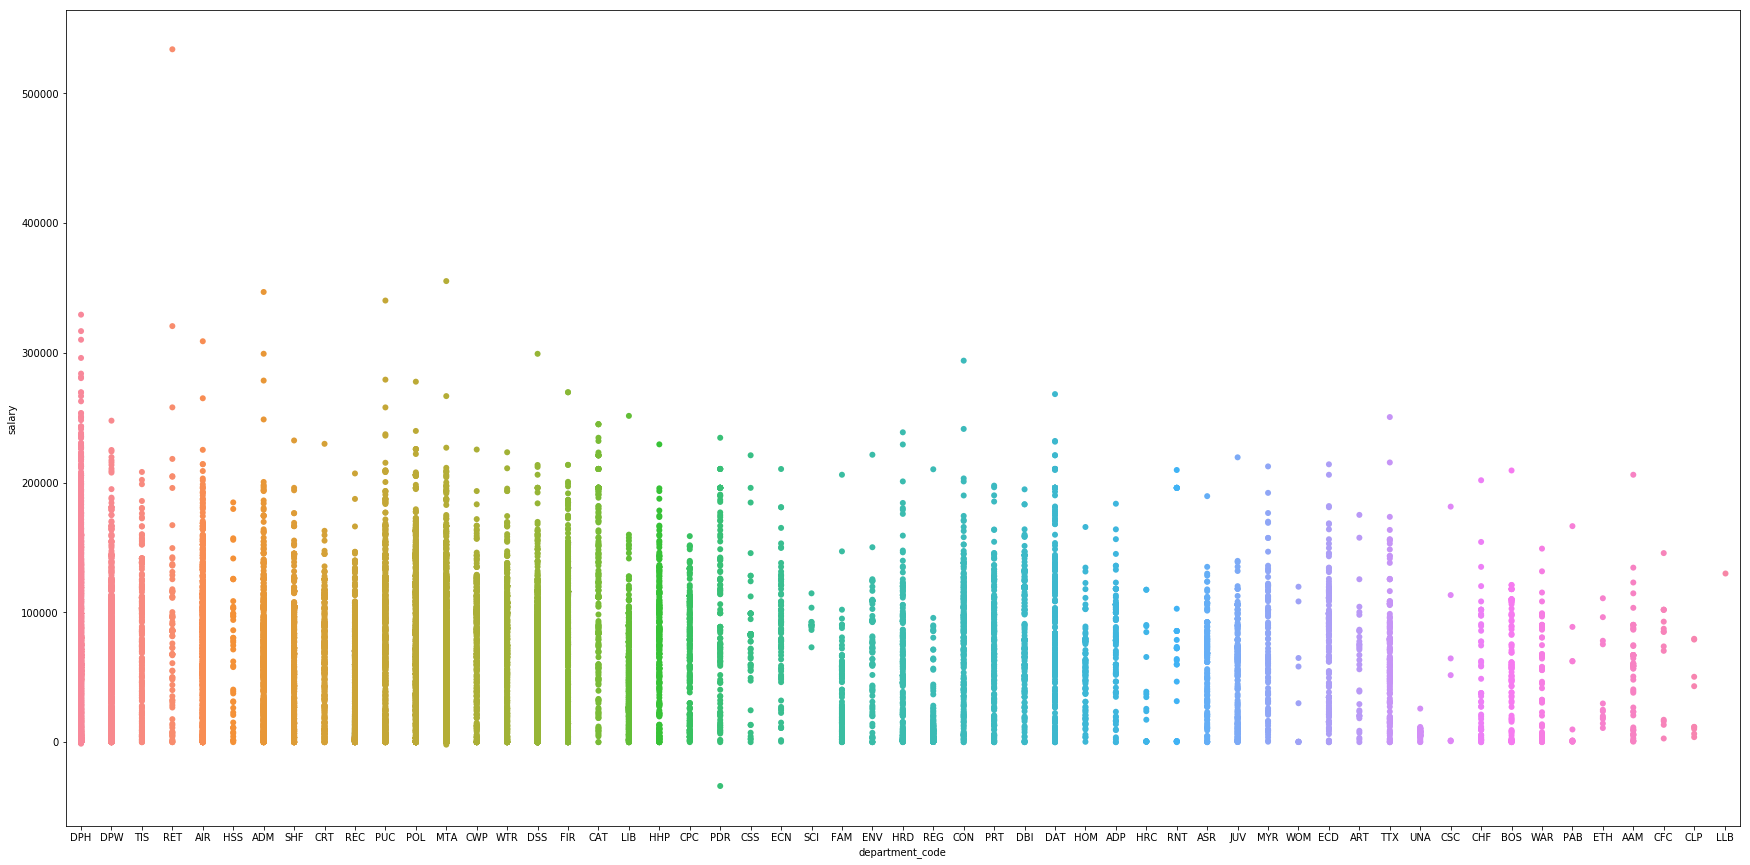

In [5]:
plt.subplots(figsize=(30,15))
g = sns.stripplot(x="department_code", y="salary", data=train, size = 6)

#g.set_xlim([-0.5,89.5])  
#for item in g.get_xticklabels():
 #   item.set_rotation(90)

#plt.subplots_adjust()
#g.tick_params(direction='out', length=6, width=2, colors='r')

#formatterX = FuncFormatter(lambda x, pos: '{0:g}'.format(x))
#g.xaxis.set_major_formatter(formatterX)
#g.set_xticklabels('department_code', rotation = (45), fontsize = 10, va='bottom', ha='left')
#plt.gcf().subplots_adjust(left=0.8, right=1 - 0.8)
#plt.show()
#plt.subplots_adjust(bottom=0.2)
#g.xaxis.set_major_locator(ticker.MultipleLocator(5))
#g.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#g.set_xticklabels(g.get_xticklabels(), rotation=90)


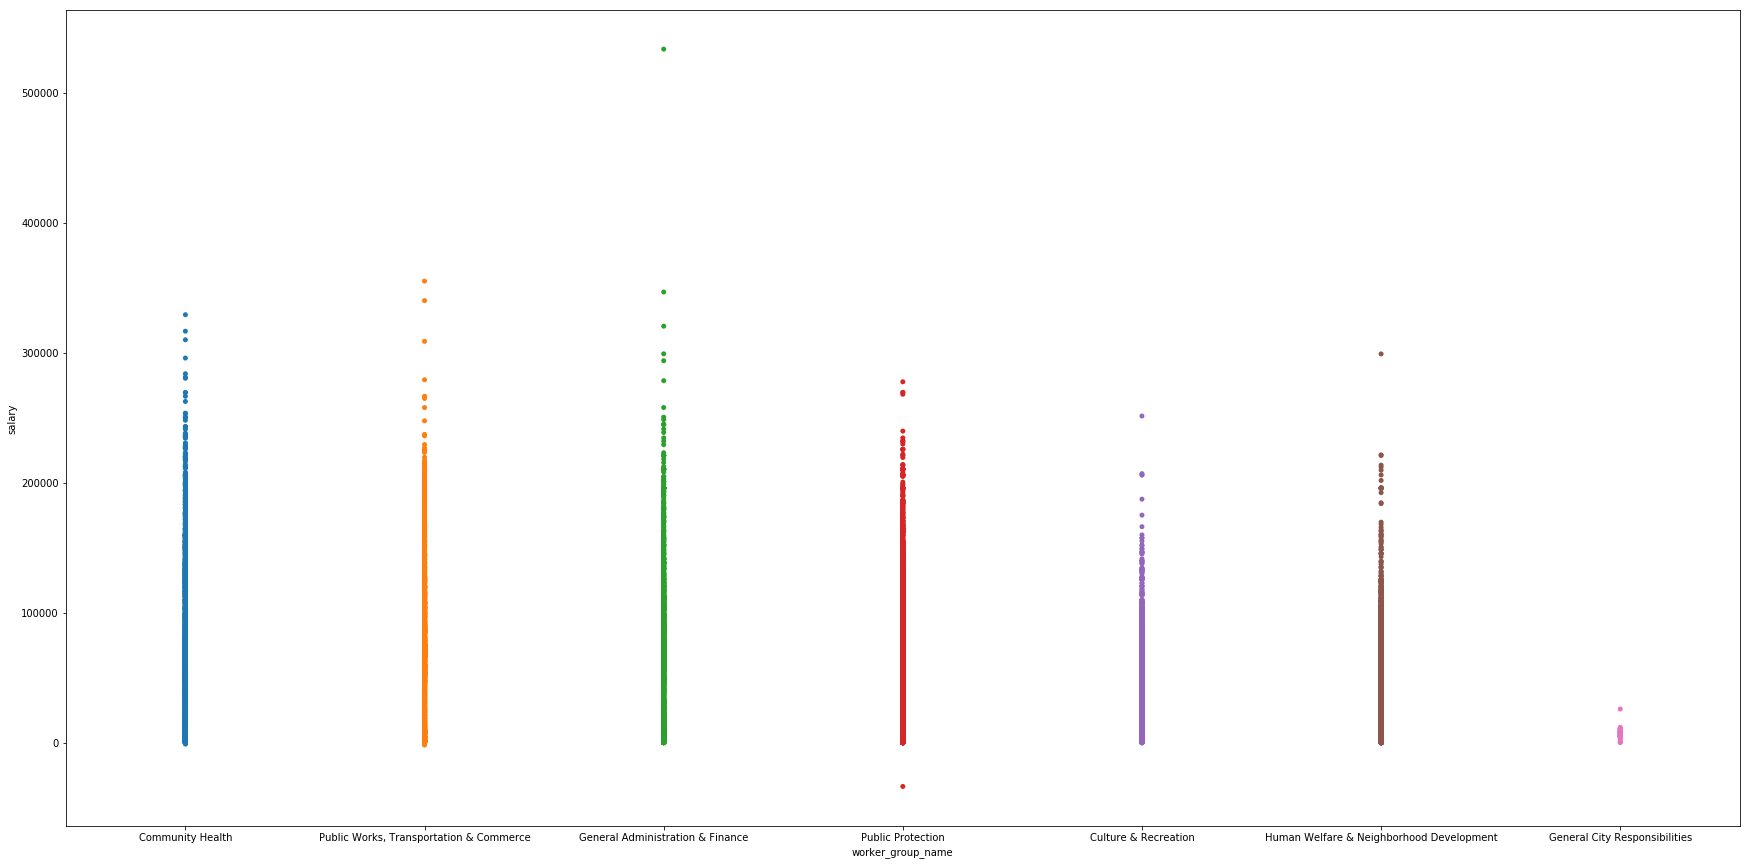

In [6]:
plt.subplots(figsize=(30,15))
g = sns.stripplot(x="worker_group_name", y="salary", data=train)


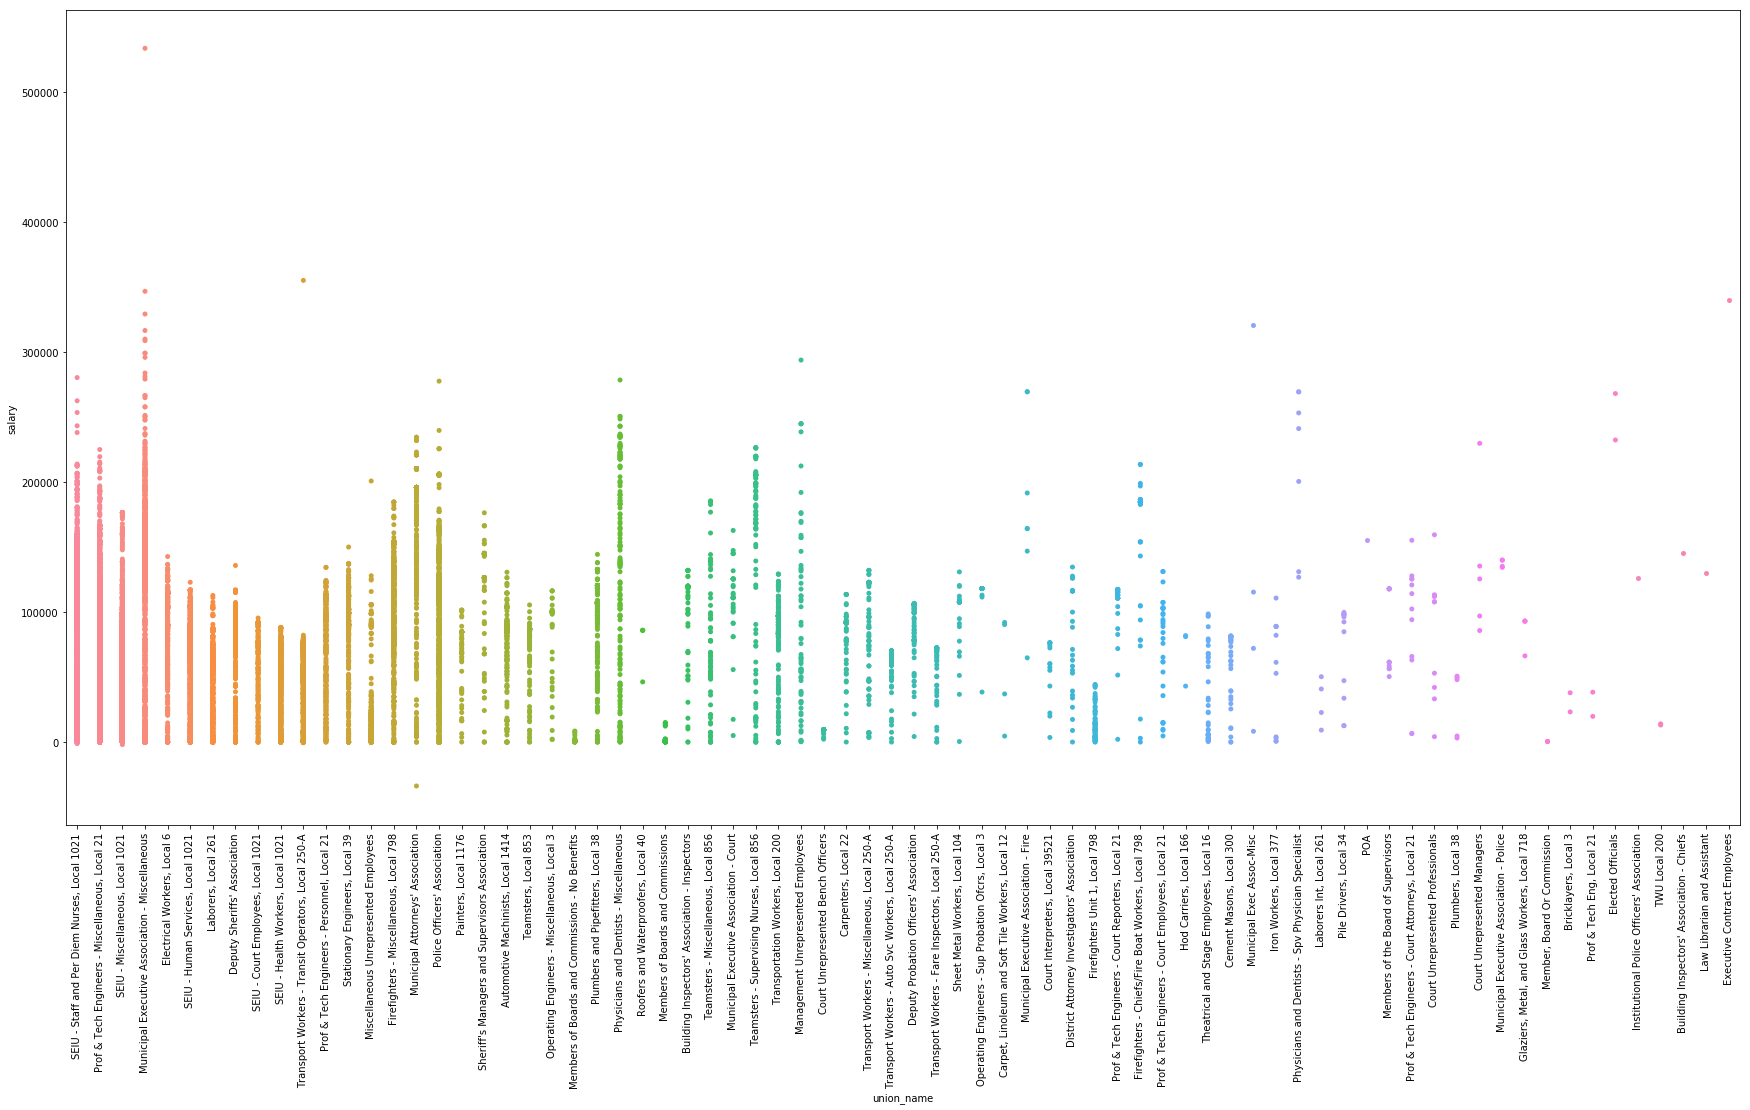

In [7]:
plt.subplots(figsize=(30,15))
g = sns.stripplot(x="union_name", y="salary", data=train)
for item in g.get_xticklabels():
    item.set_rotation(90)


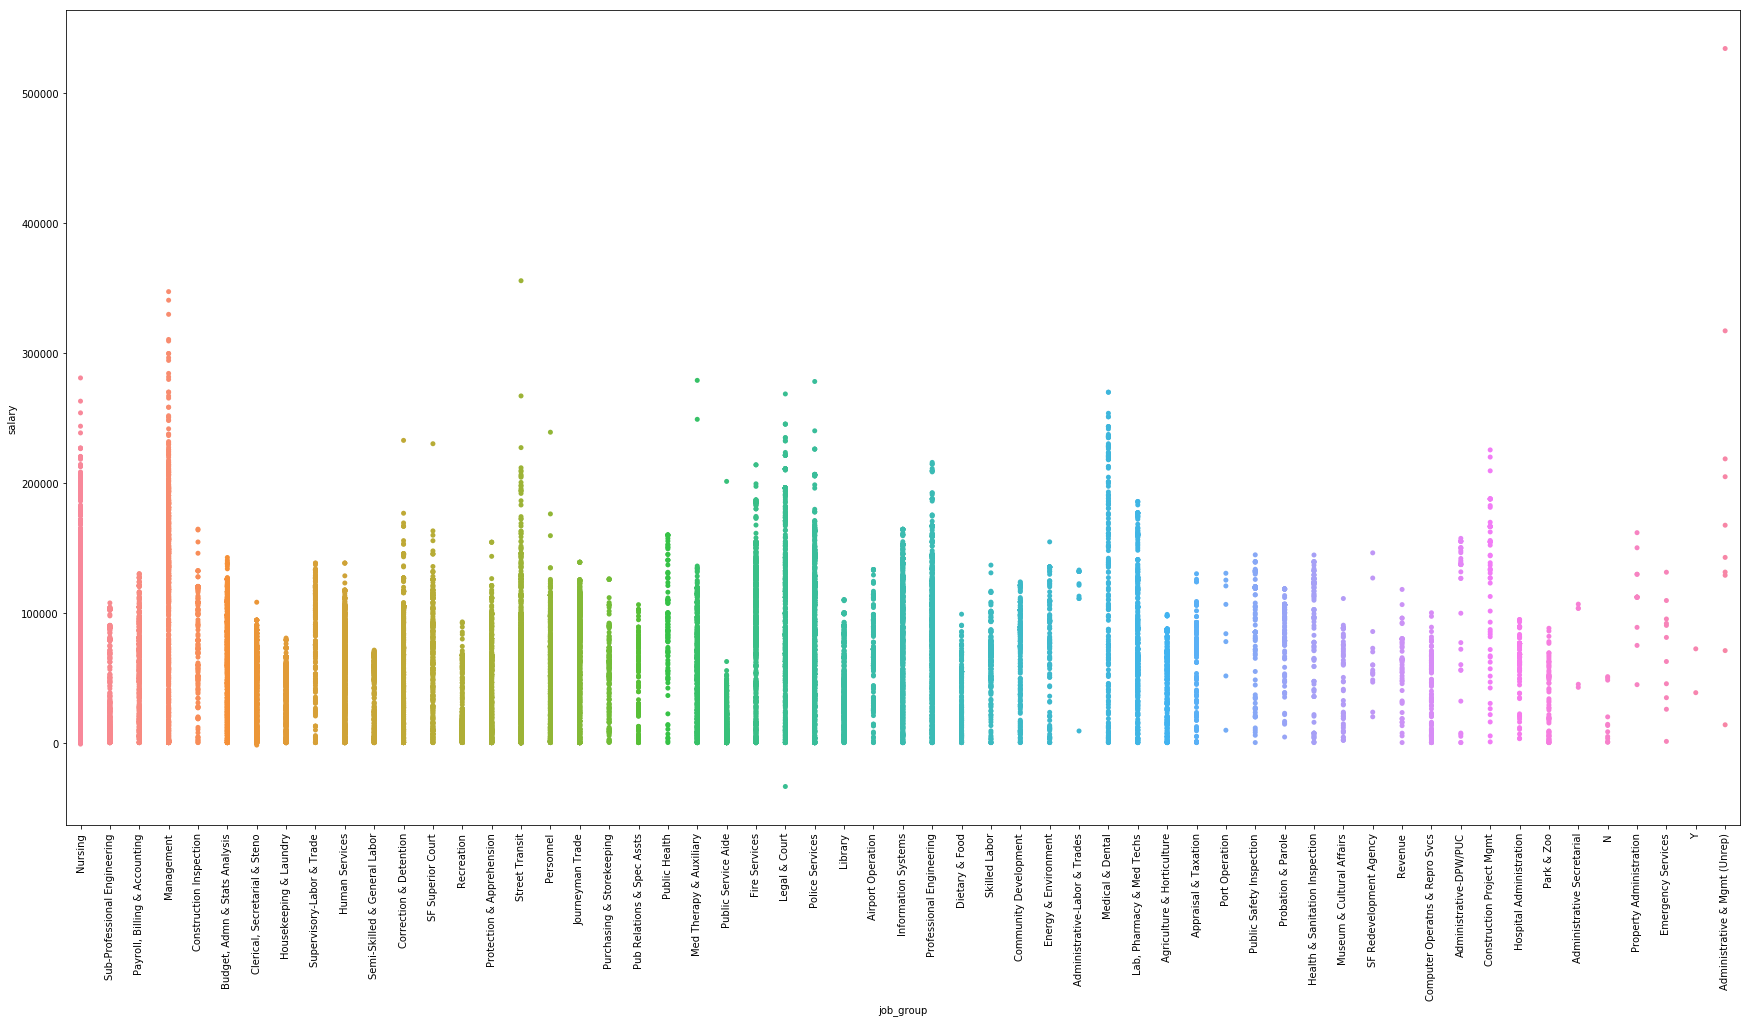

In [8]:
plt.subplots(figsize=(30,15))
g = sns.stripplot(x="job_group", y="salary", data=train)
#g.xaxis.set_major_locator(ticker.MultipleLocator(5))
#g.xaxis.set_minor_locator(ticker.MultipleLocator(1))
for item in g.get_xticklabels():
    item.set_rotation(90)

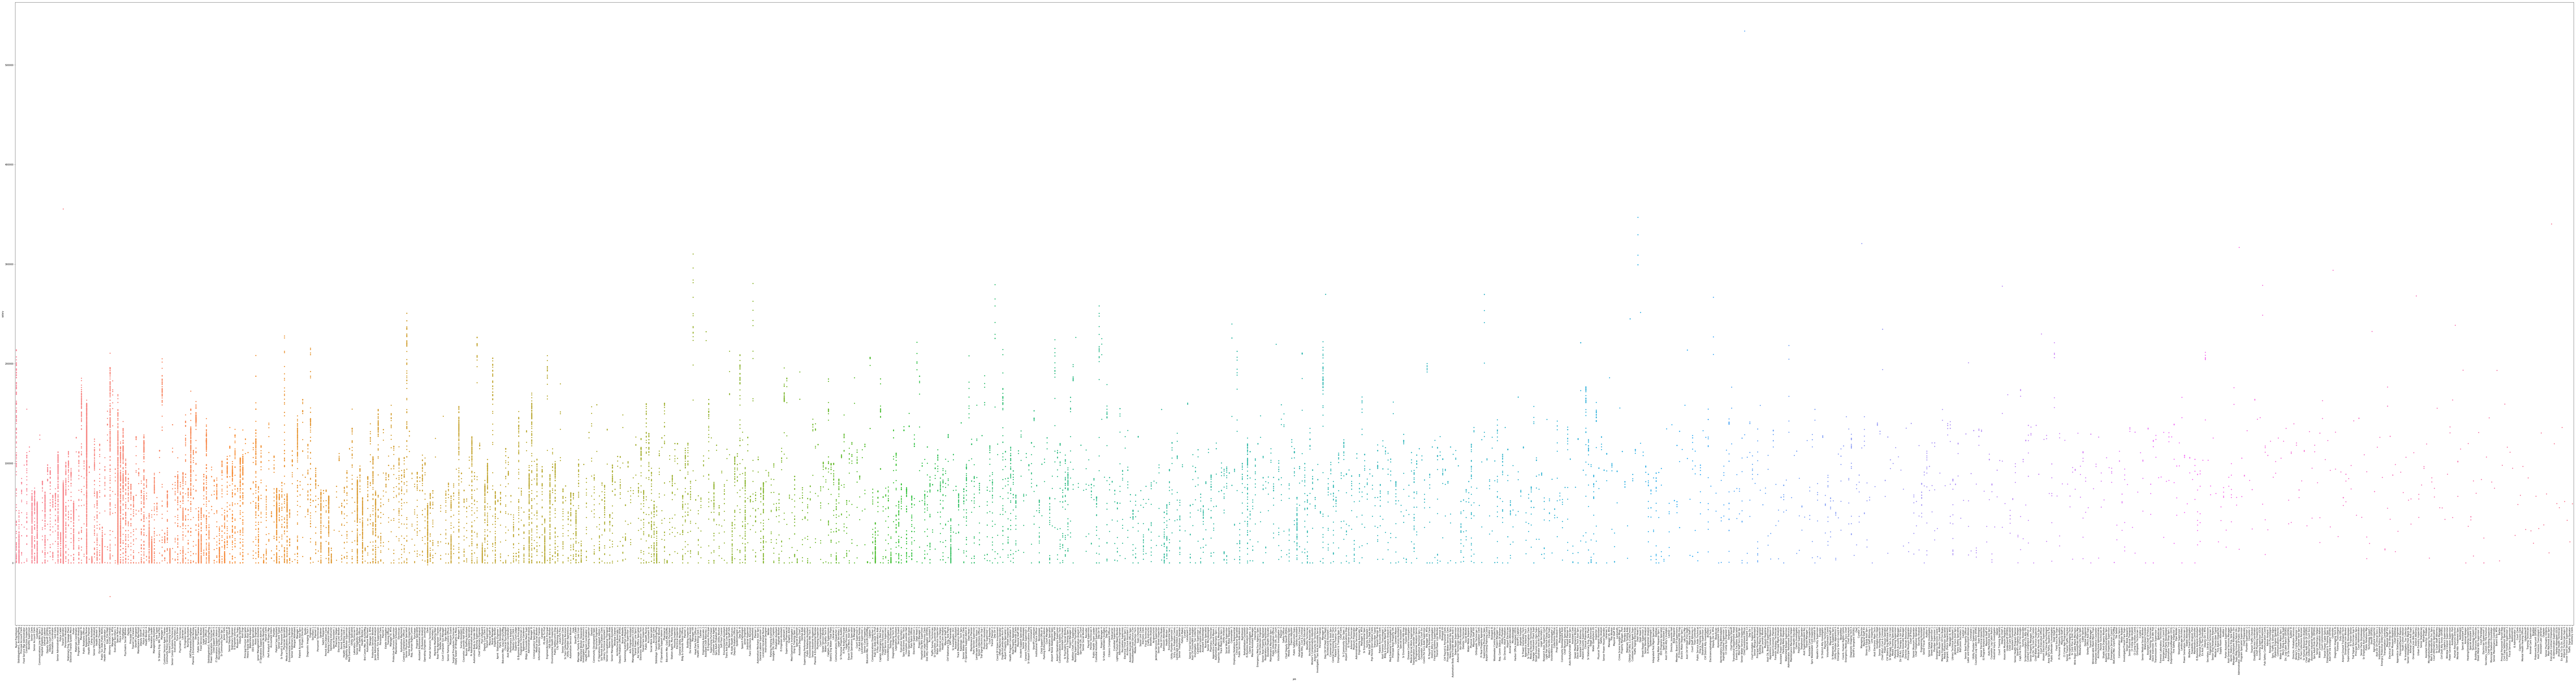

In [9]:
plt.subplots(figsize=(200,50))
g = sns.stripplot(x="job", y="salary", data=train)
for item in g.get_xticklabels():
    item.set_rotation(90)

In [10]:
test.dtypes

id                     int64
worker_group_code      int64
worker_group_name     object
department_code       object
department_name       object
union_code           float64
union_name            object
job_group_code        object
job_group             object
job_code              object
job                   object
salary               float64
dtype: object

In [11]:
dept_mapping = {'AAM': 1, 'ADM': 2, 'ADP': 3, 'AIR': 4, 'ART': 5, 'ASR': 6, 'BOS': 7, 'CAT': 8, 'CFC': 9, 'CHF': 10,
           'CLP': 11, 'CON': 12, 'CPC': 13, 'CRT': 14, 'CSC': 15, 'CSS': 16, 'CWP': 17, 'DAT': 18, 'DBI': 19, 
           'DPH': 20, 'DPW': 21, 'DSS': 22, 'ECD': 23, 'ECN': 24, 'ENV': 25, 'ETH': 26, 'FAM': 27, 'FIR': 28, 'HHP': 29, 
            'HOM': 30, 'HRC': 31, 'HRD': 32, 'HSS': 33, 'JUV': 34, 'LIB': 35, 'LLB': 36, 'MTA': 37, 'MYR' : 38, 'PAB': 39, 
            'PDR' : 40, 'POL': 41, 'PRT': 42, 'PUC': 43, 'REC': 44, 'REG' : 45, 'RET': 46, 'RNT': 47, 'SCI': 48, 'SHF': 49, 
            'TIS': 50, 'TTX': 51, 'UNA': 52, 'WAR': 53, 'WOM': 54, 'WTR': 55}
train.replace({'department_code': dept_mapping}, inplace = True)


#train['department_code'] = train.applymap(lambda s: dept_mapping.get(s) if s in dept_mapping else s)
#test['department_code'] = test.applymap(lambda s: dept_mapping.get(s) if s in dept_mapping else s)

In [12]:
train.head()

,id,worker_group_code,worker_group_name,department_code,department_name,union_code,union_name,job_group_code,job_group,job_code,job,salary
0,1,4,Community Health,20,DPH Public Health,791.0,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,2139.13
1,2,2,"Public Works, Transportation & Commerce",21,DPW GSA - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",5300,Sub-Professional Engineering,5380,"Stdntdsgntrain1, Arch/Eng/Plng",8769.90
2,3,6,General Administration & Finance,50,DT GSA - Technology,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1634,Principal Account Clerk,27267.91
3,4,4,Community Health,20,DPH Public Health,351.0,Municipal Executive Association - Miscellaneous,900,Management,2620,Food Service Mgr Administrator,396.58
4,5,2,"Public Works, Transportation & Commerce",21,DPW GSA - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",6300,Construction Inspection,6318,Construction Inspector,27519.82


In [13]:
train['job_group_code'] = pd.to_numeric(train['job_group_code'], errors='coerce')
train['job_code'] = pd.to_numeric(train['job_code'], errors = 'coerce')
train['department_code'] = pd.to_numeric(train['department_code'], errors = 'coerce')
train['job_group_code'].fillna(0, inplace = True) 
train['department_code'].fillna(0, inplace = True)
train['job_code'].fillna(0, inplace = True)
train['union_code'].fillna(0, inplace = True)
train['salary'].fillna(0, inplace = True)

test['job_group_code'] = pd.to_numeric(test['job_group_code'], errors='coerce')
test['job_code'] = pd.to_numeric(test['job_code'], errors = 'coerce')
test['department_code'] = pd.to_numeric(test['department_code'], errors = 'coerce')
test['job_group_code'].fillna(0, inplace = True) 
test['department_code'].fillna(0, inplace = True)
test['job_code'].fillna(0, inplace = True)
test['union_code'].fillna(0, inplace = True)
#train['salary'].fillna(0, inplace = True)


#train['union_code'] = train.fillna(0)
#train['salary'] = train.fillna(0)
#test['job_group_code'] = pd.to_numeric(test['job_group_code'], errors='coerce')
#test['job_code'] = pd.to_numeric(test['job_code'], errors = 'coerce')
#test['union_code'] = pd.to_numeric(test['job_code'], errors = 'coerce')
#test['job_group_code'] = test.fillna(0)
#test['job_code'] = test.fillna(0)
#test['union_code'] = test.fillna(0)
#test['salary'] = test.fillna(0)
train.head()

,id,worker_group_code,worker_group_name,department_code,department_name,union_code,union_name,job_group_code,job_group,job_code,job,salary
0,1,4,Community Health,20,DPH Public Health,791.0,"SEIU - Staff and Per Diem Nurses, Local 1021",2300.0,Nursing,2328.0,Nurse Practitioner,2139.13
1,2,2,"Public Works, Transportation & Commerce",21,DPW GSA - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",5300.0,Sub-Professional Engineering,5380.0,"Stdntdsgntrain1, Arch/Eng/Plng",8769.90
2,3,6,General Administration & Finance,50,DT GSA - Technology,790.0,"SEIU - Miscellaneous, Local 1021",1600.0,"Payroll, Billing & Accounting",1634.0,Principal Account Clerk,27267.91
3,4,4,Community Health,20,DPH Public Health,351.0,Municipal Executive Association - Miscellaneous,900.0,Management,2620.0,Food Service Mgr Administrator,396.58
4,5,2,"Public Works, Transportation & Commerce",21,DPW GSA - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",6300.0,Construction Inspection,6318.0,Construction Inspector,27519.82


In [14]:
train.dtypes


id                     int64
worker_group_code      int64
worker_group_name     object
department_code        int64
department_name       object
union_code           float64
union_name            object
job_group_code       float64
job_group             object
job_code             float64
job                   object
salary               float64
dtype: object

In [15]:
features = ['worker_group_code', 'union_code','job_group_code','job_code']
target = ['salary']

In [16]:
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test [target]
X_train.dtypes

#print(Y_test)

worker_group_code      int64
union_code           float64
job_group_code       float64
job_code             float64
dtype: object

In [17]:
fsel = SelectKBest(score_func=f_regression, k=3)
fit = fsel.fit(X_train, Y_train)
print(fit.scores_)



[ 1103.96183707   314.809997     867.13657923   678.56080443]


C:\Users\arpit\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
test_predict = lr.predict(X_test)
print(test_predict)
#regression_model_mse = mean_squared_error(test_predict, Y_test)
#print(regression_model_mse)

[[ 85188.3390649 ]
 [ 65272.88431865]
 [ 61724.520678  ]
 ..., 
 [ 54211.52115195]
 [ 80800.42059768]
 [ 61724.520678  ]]


In [20]:
lr.score(X_train, Y_train)

0.10265492964451006

In [21]:
print(lr.coef_)

[[ -6.62964545e+03  -2.36371512e+01  -6.05406074e+00   2.47784943e+00]]


In [22]:
#result = test['id'].copy()
prediction=pd.DataFrame(test_predict, columns=['pred']) 
#print(prediction)
#result = pd.merge(test['id'], prediction)
#print(test['id'])
print(prediction)
prediction.head()
prediction.dtypes
#result = prediction.append(test['id'])
#frames = [test['id'], prediction]
#result = pd.concat(frames)
#prediction.dtypes
#prediction.fillna(0)
#prediction.head()
#result.head()

                pred
0       85188.339065
1       65272.884319
2       61724.520678
3       61724.520678
4       87859.337152
5       62917.821306
6       61724.520678
7       80840.066189
8       82004.253194
9       85188.339065
10      63838.259401
11     102112.539334
12      87859.337152
13      70457.993456
14      54211.521152
15      61724.520678
16      88760.047388
17      94015.057509
18      69728.927216
19      69728.927216
20      77519.831476
21      65277.840018
22      82891.581994
23      46137.278679
24      87859.337152
25      89452.707532
26      65129.568662
27      20389.362522
28      77534.698573
29      48660.447523
...              ...
12970   67484.086451
12971   57347.210907
12972   39409.429954
12973   87859.337152
12974   46139.756529
12975   61899.565573
12976   81026.715709
12977   81167.953127
12978   71782.841160
12979   61724.520678
12980   65264.114264
12981   59742.606764
12982   73148.193767
12983   45284.082144
12984   58381.398389
12985   69792

pred    float64
dtype: object

In [23]:
result = pd.DataFrame({'id': test['id'], 'salary': prediction['pred']})

In [24]:
print(result)

          id         salary
0      30001   85188.339065
1      30002   65272.884319
2      30003   61724.520678
3      30004   61724.520678
4      30005   87859.337152
5      30006   62917.821306
6      30007   61724.520678
7      30008   80840.066189
8      30009   82004.253194
9      30010   85188.339065
10     30011   63838.259401
11     30012  102112.539334
12     30013   87859.337152
13     30014   70457.993456
14     30015   54211.521152
15     30016   61724.520678
16     30017   88760.047388
17     30018   94015.057509
18     30019   69728.927216
19     30020   69728.927216
20     30021   77519.831476
21     30022   65277.840018
22     30023   82891.581994
23     30024   46137.278679
24     30025   87859.337152
25     30026   89452.707532
26     30027   65129.568662
27     30028   20389.362522
28     30029   77534.698573
29     30030   48660.447523
...      ...            ...
12970  42971   67484.086451
12971  42972   57347.210907
12972  42973   39409.429954
12973  42974   87859

In [25]:
#result.head()
result.to_csv('res5.csv', index = False)